In [47]:
import os, sys, datetime
import numpy as np
import tqdm
import youtube_dl
from IPython.display import YouTubeVideo as play

In [48]:
class MyLogger(object):
    def debug(self, msg):
        print("D- OH NO! {}".format(msg))
        pass

    def warning(self, msg):
        print("W- OH NO! {}".format(msg))
        pass

    def error(self, msg):
        print("E- OH NO! {}".format(msg))
        print(msg)


def my_hook(d):
    if d['status'] == 'finished':
        print('Done downloading, now converting ...')

nRBnh4qbPHI


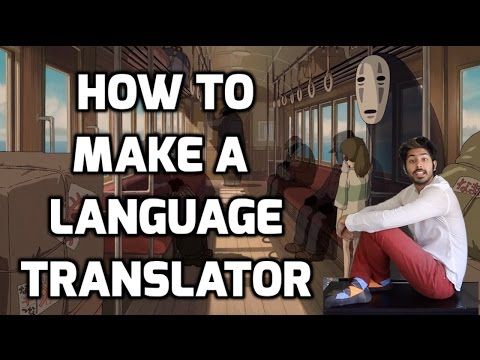

In [49]:
video = "https://www.youtube.com/watch?v=nRBnh4qbPHI"
video = video.split('=')
print(video)
play(video)

In [ ]:
UNAME = 'billingscronicsupply@gmail.com'
PASS = 0

In [54]:
### Format the output of the video
playlist = "%(playlist)s"
chapter_number = "%(chapter_number)s"
chapter = "%(chapter)s"
title = "%(title)s"
ids = "%(id)s"
ext = "%(ext)s"
ext = ".mp4"
filename = "{}{}_{}-{:10}{}".format(playlist,chapter_number,chapter,title,ext)
print(filename)

%(playlist)s%(chapter_number)s_%(chapter)s-%(title)s .mp4


In [ ]:
ydl_opts = {
    # 'username': UNAME,
    # 'password': PASS,
    'usenetrc': True,
    'forceurl': True,
    'forcetitle': True,
    'noplaylist': True,
    'forcefilename': True,
    'restrictfilenames': True,
    'logger': MyLogger(),
    'progress_hooks': [my_hook],
    'outtmpl': '%(id)s.mp4',
    'format': 'bestaudio/best',
    'keepvideo': True,
    'writeannotations': True,
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }] 
}

In [43]:
# file = 0

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    file = ydl.download([video])

[youtube] nRBnh4qbPHI: Downloading webpage
[youtube] nRBnh4qbPHI: Downloading video info webpage
[youtube] nRBnh4qbPHI: Extracting video information
[youtube] nRBnh4qbPHI: Downloading MPD manifest
nRBnh4qbPHI.mp4
[download] Destination: nRBnh4qbPHI.mp4
[download] 100% of 8.71MiB in 00:0225MiB/s ETA 00:0008
[ffmpeg] Destination: nRBnh4qbPHI.mp3
Deleting original file nRBnh4qbPHI.mp4 (pass -k to keep)


In [40]:
path = "."
videos = []
if os.path.isdir(path):
    x = os.listdir(path)
    for i, ele in enumerate(x):
        if "mkv" in ele:
            videos.append(x[i])
print(videos)

['doAcaKGeQwI.mkv']


In [15]:
YouTubeVideo(videos[0])

In [16]:
from IPython.display import DisplayObject

In [19]:
DisplayObject(videos[0])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 13: invalid start byte

In [11]:
%%HTML
<video width="320" height="240" controls>
  <source src=videos[0] type="video/mkv">
</video>

In [ ]:
import re

from bs4 import BeautifulSoup
import requests

url = 'http://weibo.com/2239529624/En0IU3nLQ?filter=hot&root_comment_id=0&type=comment'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36'}

with requests.Session() as session:
    session.headers = headers

    response = session.get(url)

    soup = BeautifulSoup(response.content)

    # follow the iframe url
    response = session.get('http:' + soup.iframe['src'], headers={'Referer': url})
    soup = BeautifulSoup(response.content)

    # extract the video URL from the script tag
    print(re.search(r'"url":"(.*?)"', soup.script.text).group(1))